# Object Oriented Programming (OOP)

---

organized by Francesco Mantegna in 2023

This notebook gives an overview of Object Oriented Programming (OOP) in python. We will go through the following steps:
- create a class
- instantiate an object
- apply transformations to an object over time
- apply transformations to multiple objects over time

Finally, we are going to discuss how can we use OOP to build neural network models or reinforcement learning models.

Note: this notebook was based on a tutorial by Charl P. Botha 

---

## Importing Libraries

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

<div class="alert alert-danger" role="alert">
  <strong>Strong Warning!</strong> <br>
    Make sure that you run "pip install ipympl" or "conda install ipympl" before running the cell below. Otherwise, comment the third line in the cell below and try to uncomment either the first or the second line.
</div>

In [2]:
# this command is necessary to plot matplotlib animations on jupyter notebook

# one of the following lines should work depending on your jupyter notebook version
# uncomment one line and comment the other two lines

# %matplotlib notebook
# %matplotlib inline
%matplotlib ipympl

---

## Creating Circles

The higher-level structure is called class. It is more abstract, like a blueprint.

Classes have attributes (numerical or logical properties) and methods (operations that can be performed)

In [3]:
class Circle(object):
    
    def __init__(self, radius, centre):  # 
        self.radius = radius             # <-- ATTRIBUTES
        self.centre = centre             #
        
    def circumference(self):                #
        return 2.0 * math.pi * self.radius  #
                                            #
    def area(self):                         #
        return math.pi * self.radius ** 2   #
                                            #
    def point_inside(self, xy):             #
        dist_x = xy[0] - self.centre[0]     # <-- METHODS
        dist_y = xy[1] - self.centre[1]     # 
        dist = math.hypot(dist_x, dist_y)   #
                                            #
        if dist < self.radius:              #
            return True                     #
        else:                               #
            return False                    #


Classes can be instantiated creating an object.

In [4]:
c1 = Circle(3, (0,0))

print(c1.circumference())
print(c1.area())
c1.point_inside((1,1))

18.84955592153876
28.274333882308138


True

Let's plot three circle objects.

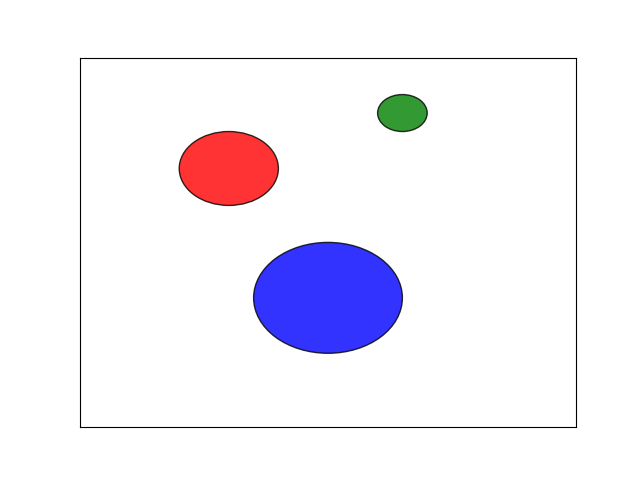

In [5]:
c1 = Circle(2, (6,14))
c2 = Circle(3, (10,7))
c3 = Circle(1, (13,17))
circle1 = plt.Circle(c1.centre, c1.radius, facecolor='red', edgecolor='k', alpha=0.8)
circle2 = plt.Circle(c2.centre, c2.radius, facecolor='blue', edgecolor='k', alpha=0.8)
circle3 = plt.Circle(c3.centre, c3.radius, facecolor='green', edgecolor='k', alpha=0.8)

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0,20), ylim=(0,20))
ax.tick_params(axis='both', which='both', bottom=False, left=False, labelleft=False, labelbottom=False)
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
plt.show()

---

## One Bouncing Circle

One important feature of the class structure is that attributes can be modified over time resulting in dynamic transformations of the instantiated objects.

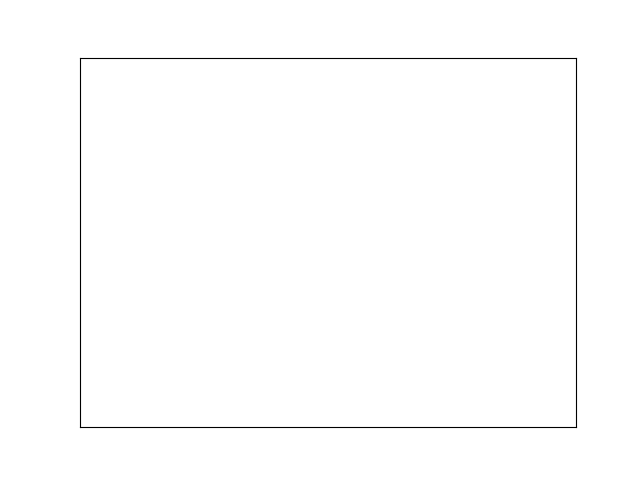

In [6]:
# gravitational acceleration on Earth in m*s^-2
g = 9.80665
# acceleration vector due to g
ag = np.array((0,-g))
# coefficient of restitution (ratio of velocity after and before bounce)
# see http://en.wikipedia.org/wiki/Coefficient_of_restitution
cor = 0.9

# bounds of the room
xlim = (0,30)
ylim = (0,20)

# position of the ball
xy = np.array((3.0,18.0))
# velocity of the ball
v = np.array((0.2,0.3))

# 10 millisecond delta t
delta_t = 0.01

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=xlim, ylim=ylim)
ax.tick_params(axis='both', which='both', bottom=False, left=False, labelleft=False, labelbottom=False)

class Circle(object):
    
    def __init__(self, xy, v):
        """
        :param xy: Initial position.
        :param v: Initial velocity.
        """
        self.xy = np.array(xy)
        self.v = np.array(v)
        
        self.scatter, = ax.plot([], [], 'o', alpha=0.7, markeredgecolor='k', markersize=20)
        
    def update(self):
        if self.xy[0] <= xlim[0]:
            # hit the left wall, reflect x component
            self.v[0] = cor * np.abs(self.v[0])
            
        elif self.xy[0] >= xlim[1]:
            # hit the right wall, reflect x component
            self.v[0] = - cor * np.abs(self.v[0])
            
        if self.xy[1] <= ylim[0]:
            # hit the left wall, reflect y component
            self.v[1] = cor * np.abs(self.v[1])
            
        elif self.xy[1] >= ylim[1]:
            # hit the right wall, reflect y component
            self.v[1] = - cor * np.abs(self.v[1])
        
        # delta t is 0.01
        delta_v = delta_t * ag
        self.v += delta_v
        
        self.xy += self.v
        
        self.xy[0] = np.clip(self.xy[0], xlim[0], xlim[1])
        self.xy[1] = np.clip(self.xy[1], ylim[0], ylim[1])
        
        self.scatter.set_data(self.xy)
        
circle = Circle(xy, v)

# below is a wrapper for animation over time
        
def init():
    return []

def animate(t):
    # t is time in seconds
    global xy, v
    
    circle.update()
    
    return circle.scatter 

# interval in milliseconds
# we're watching in slow motion (delta t is shorter than interval)
ani = animation.FuncAnimation(fig, animate, np.arange(0,10,delta_t), init_func=init, interval=20, blit=True)
plt.show()

---

## Multiple Bouncing Circles

Another cool thing is that we can apply different transformations to different instances of the same class resulting in different attributes and behavior.

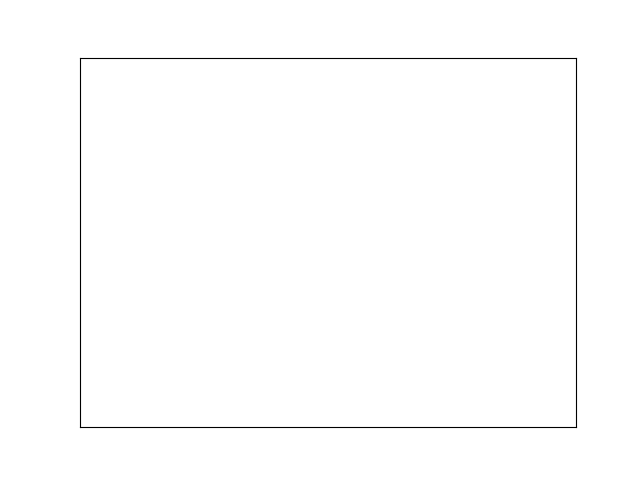

In [7]:
# gravitational acceleration on Earth in m*s^-2
g = 9.80665
# acceleration vector due to g
ag = np.array((0,-g))
# coefficient of restitution (ratio of velocity after and before bounce)
# see http://en.wikipedia.org/wiki/Coefficient_of_restitution
cor = 0.9

# bounds of the room
xlim = (0,30)
ylim = (0,20)

# 10 millisecond delta t
delta_t = 0.01

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=xlim, ylim=ylim)
ax.tick_params(axis='both', which='both', bottom=False, left=False, labelleft=False, labelbottom=False)

class Circle(object):
    
    def __init__(self, xy, v):
        """
        :param xy: Initial position.
        :param v: Initial velocity.
        """
        self.xy = np.array(xy)
        self.v = np.array(v)
        
        self.scatter, = ax.plot([], [], 'o', alpha=0.7, markeredgecolor='k', markersize=20)
        
    def update(self):
        if self.xy[0] <= xlim[0]:
            # hit the left wall, reflect x component
            self.v[0] = cor * np.abs(self.v[0])
            
        elif self.xy[0] >= xlim[1]:
            self.v[0] = - cor * np.abs(self.v[0])
            
        if self.xy[1] <= ylim[0]:
            # hit the left wall, reflect y component
            self.v[1] = cor * np.abs(self.v[1])
            
        elif self.xy[1] >= ylim[1]:
            self.v[1] = - cor * np.abs(self.v[1])
        
        # delta t is 0.01
        delta_v = delta_t * ag
        self.v += delta_v
        
        self.xy += self.v
        
        self.xy[0] = np.clip(self.xy[0], xlim[0], xlim[1])
        self.xy[1] = np.clip(self.xy[1], ylim[0], ylim[1])
        
        self.scatter.set_data(self.xy)
        
        
circles = [Circle((3.0,18.0), (0.2,0.3)), Circle((4.0,17.0), (-0.2,0.1)), Circle((21.0,19.0), (-0.3,0.5)),
         Circle((28.0,16.0), (-0.1,0.4)), Circle((5.0,14.0), (-0.3,0.6)), Circle((5.0,14.0), (0.5,0.1))]

# below is a wrapper for animation over time

def init():
    return []

def animate(t):
    # t is time in seconds
    global xy, v

    for circle in circles:
        circle.update()
    
    # have to return an iterable
    return [circle.scatter for circle in circles]

# interval in milliseconds
# we're watching in slow motion (delta t is shorter than interval)
ani = animation.FuncAnimation(fig, animate, np.arange(0,10,delta_t), init_func=init, interval=20, blit=True)
plt.show()

## Why is this relevant for the CCM class?

Both **neural network models** and **reinforcement learning models** are typically implemented using object-oriented programming

In [ ]:
# neural network model structured using object oriented programming 
# (more details in the following lectures)

class NeuralNetwork(object):
    def __init__(self):       #
        # weigths             # <-- ATTRIBUTES
        # architecture        #
        pass                  #

    def forward(self, x):                   #
        # forward pass                      #
        pass                                #
                                            #
    def predict(self,x):                    #
        # predict the most likely output    # <-- METHODS
        pass                                #
                                            #
    def loss(y_predicted,y_true):           #
        # compute the loss                  #
        pass                                #
        

In [ ]:
# reinforcement learning model structured using object oriented programming
# (more details in the following lectures)

class Teacher(object):
    def __init__(self):   #
        # ability level   # <-- ATTRIBUTES
        pass              # 
        
    def makeMove(self, board):                          #
        # best move from currently available options    #
        pass                                            #
                                                        # <-- METHODS
    def randomMove(self,board):                         #
        # random move rom currently available options   #
        pass                                            #
    
class Learner(object):
    def __init__(self):          #
        # learning rate          #
        # temporal discounting   # <-- ATTRIBUTES
        pass                     #
    
    def get_action(self, state):                           #
        # select an action given the current game state.   # <-- METHODS
        pass                                               #
    